In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
savedir = pathlib.Path('figures')
os.makedirs(savedir, exist_ok=True)

In [2]:
# penguin data (sorce: https://www.wildlife.vic.gov.au/)

fairy_penguins = dict(max_height=45, max_weight=1.2)
emperor_penguins = dict(max_height=110, max_weight=30)

def make_data(di, n=25, std=.2, minval=.2):
    x = np.linspace(minval,1,n) * di['max_height']
    y = np.linspace(minval,1,n) * di['max_weight']
    epsilon = np.random.normal(0,std,n) # random draws from normal distribution
    y_rand = y + epsilon
    return x, y_rand

def make_model(x, y_rand):
    coeffs = np.polyfit(x, y_rand, 1) # fit linear model
    y_pred = np.poly1d(coeffs)(x) # predict
    return coeffs, y_pred

In [3]:
# model fairy penguin sizes
np.random.seed(28)
fdi = fairy_penguins
fx, fy_rand = make_data(fdi)
fcoeffs, fy_pred = make_model(fx, fy_rand)
fairy_label = fr'fairy penguin model: $h={fcoeffs[0]:.2f}+{fcoeffs[1]:.2f}\times w$'

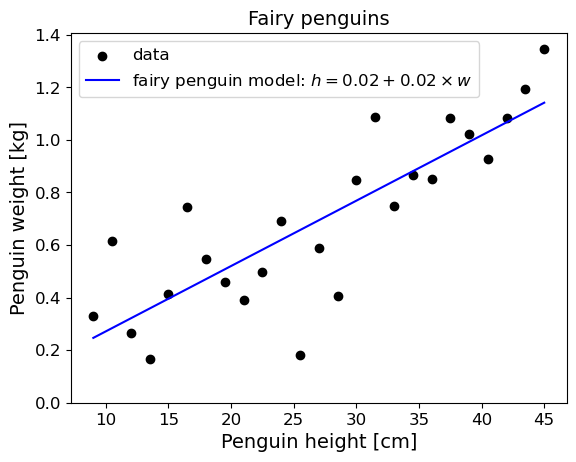

In [4]:
fig, ax = plt.subplots()
fs = 14

ax.scatter(fx, fy_rand, marker='o', c='k', label='data')
ax.plot(fx, fy_pred, c='b', label=fairy_label)
ax.set_ylabel('Penguin weight [kg]', fontsize=fs)
ax.set_xlabel('Penguin height [cm]', fontsize=fs)
ax.set_title('Fairy penguins', fontsize=fs)
ax.set_ylim(0,None)
ax.legend(fontsize=fs-2)
ax.tick_params(axis='both', which='major', labelsize=fs-2)

fig.savefig(savedir / 'fairy_penguins.jpg')

In [7]:
# now apply the same model to Emperor penguins
edi = emperor_penguins
ex, ey_rand = make_data(edi, std=4, minval=.2)
ey_pred = np.poly1d(fcoeffs)(ex) # use the fairy penguin coefficients to predict the emperor penguin weights
ecoeffs, ey_pred_better = make_model(ex, ey_rand) # compare this with using a new model
emperor_label = fr'emperor penguin model: $h={ecoeffs[0]:.2f}{ecoeffs[1]:.2f}\times w$'

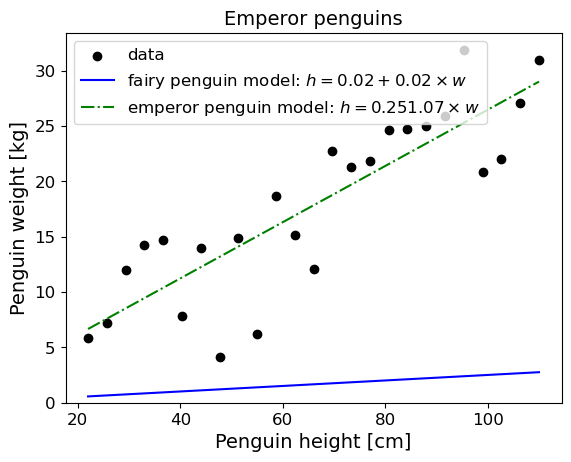

In [10]:
fig, ax = plt.subplots()
fs = 14

ax.scatter(ex, ey_rand, marker='o', c='k', label='data')
ax.plot(ex, ey_pred, c='b', label=fairy_label)
ax.plot(ex, ey_pred_better, c='g', ls='-.', label=emperor_label)
ax.set_ylabel('Penguin weight [kg]', fontsize=fs)
ax.set_xlabel('Penguin height [cm]', fontsize=fs)
ax.set_title('Emperor penguins', fontsize=fs)
ax.set_ylim(0,None)
ax.legend(fontsize=fs-2)
ax.tick_params(axis='both', which='major', labelsize=fs-2)

# fig.savefig(savedir / 'emperor_penguins_2.jpg')
